In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D, Conv1D, MaxPooling1D
from tensorflow.keras.layers import LSTM, Embedding, GRU
import tensorflow as tf

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
def plot(history, info_type='loss'):

    """
    history: the history callback from a model.fit
    info_type: what you want to show. (e.g. 'loss', 'acc', 'accuracy')
    """
    plt.plot(history.history[info_type], label=[info_type])
    try:
        plt.plot(history.history['val_' + info_type], label=['val_' + info_type])
    except Exception:
        print(f'no val_{info_type}')
    plt.title(info_type)
    plt.legend()

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/subjects-questions.csv')

In [ ]:
df.head()

,eng,Subject
0,An anti-forest measure is\nA. Afforestation\nB...,Biology
1,"Among the following organic acids, the acid pr...",Chemistry
2,If the area of two similar triangles are equal...,Maths
3,"In recent year, there has been a growing\nconc...",Biology
4,Which of the following statement\nregarding tr...,Physics


In [ ]:
df['ca_labels'] = df['Subject'].map({'Biology':0, 'Chemistry':1, 'Maths':2, 'Physics':3})

In [ ]:
y = df['ca_labels'].values

In [ ]:
df['ca_labels'].values

array([0, 1, 2, ..., 0, 3, 3])

In [ ]:
y.shape

(122519,)

In [ ]:
x = df['eng'].values

In [ ]:
for i in range(len(x)):
    x[i] = x[i].replace('\n', ' ')

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.33, shuffle=True)

In [ ]:
vocab_size = 1000
oov_token = '<oov>'
trunc='post'
maxlen = 50
embedded_dim = 8

In [ ]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_token)

In [ ]:
tokenizer.fit_on_texts(x_train)
word_index = tokenizer.word_index

In [ ]:
sequences = tokenizer.texts_to_sequences(x_train)

In [ ]:
len(word_index)

36012

In [ ]:
padded = pad_sequences(sequences, maxlen=maxlen, truncating=trunc)

In [ ]:
padded.shape

(82087, 50)

In [ ]:
testing_sequence = tokenizer.texts_to_sequences(x_test)
test_padded = pad_sequences(testing_sequence, maxlen=maxlen)

In [ ]:
test_padded.shape

(40432, 50)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size,embedded_dim,input_length=maxlen),
    tf.keras.layers.Conv1D(64, 3, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(50, activation='relu', activity_regularizer=tf.keras.regularizers.L2(0.01)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(50, activation='relu', activity_regularizer=tf.keras.regularizers.L2(0.01)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(4, activation='softmax')
])

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',metrics=['acc'], optimizer='adam')

In [ ]:
hist = model.fit(padded,y_train,batch_size=64, epochs=20, validation_data=(test_padded,y_test), validation_batch_size=64)

Epoch 1/20
1283/1283 [==============================] - 9s 6ms/step - loss: 0.5817 - acc: 0.7882 - val_loss: 0.4287 - val_acc: 0.8549
Epoch 2/20
1283/1283 [==============================] - 7s 6ms/step - loss: 0.3755 - acc: 0.8746 - val_loss: 0.4068 - val_acc: 0.8583
Epoch 3/20
1283/1283 [==============================] - 8s 6ms/step - loss: 0.3467 - acc: 0.8822 - val_loss: 0.3900 - val_acc: 0.8622
Epoch 4/20
1283/1283 [==============================] - 8s 6ms/step - loss: 0.3323 - acc: 0.8863 - val_loss: 0.3831 - val_acc: 0.8647
Epoch 5/20
1283/1283 [==============================] - 8s 6ms/step - loss: 0.3217 - acc: 0.8879 - val_loss: 0.3907 - val_acc: 0.8634
Epoch 6/20
1283/1283 [==============================] - 8s 6ms/step - loss: 0.3142 - acc: 0.8901 - val_loss: 0.3792 - val_acc: 0.8661
Epoch 7/20
1283/1283 [==============================] - 8s 6ms/step - loss: 0.3092 - acc: 0.8918 - val_loss: 0.3790 - val_acc: 0.8642
Epoch 8/20
1283/1283 [==============================] - 8s 6ms

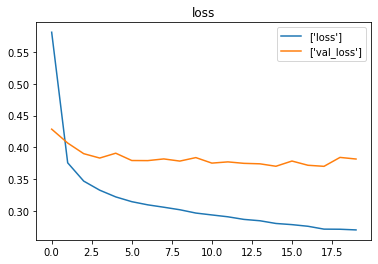

In [ ]:
plot(hist)

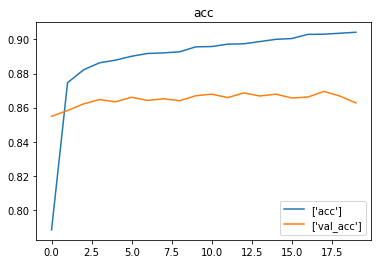

In [ ]:
plot(hist, 'acc')

In [ ]:
text='''Some hydrogen-like atom in ground state absorb \( n \) photons having the same energy and on de-excitation, it
emits exactly \( n \) photons. Then the energy of absorbed photon may be:
This question has multiple correct options
A. \( 91.8 e V \)
B. \( 40.8 e V \)
c. \( 48.4 e V \)
D. \( 54.4 e V \))'''.replace('\n',' ')


sequences1 = tokenizer.texts_to_sequences([text])

#print(len(sequences1))
padded1 = pad_sequences(sequences1, maxlen=maxlen, truncating=trunc)
#padded1.shape
model.predict(padded1)


array([[2.3557737e-03, 6.4698178e-01, 4.7016589e-04, 3.5019225e-01]],
      dtype=float32)

In [ ]:
import pickle

with open('/content/drive/MyDrive/Colab Notebooks/tokenizer20.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/pcmb20_model.h5')